# Estimating the real mortality rate for COVID-19

In this project, we attempt to estimate the mortality rate for COVID-19 (the "new coronavirus") while controlling for country-level covariates such as access to healthcare and age of population.

The observed mortality of COVID-19 has varied widely from country to country (as of early March, 2020), which makes it difficult to get a handle on the overall mortality rate.  For instance, as of March 10, mortality rates have ranged from < 0.1% in places like Germany (1100+ cases) to upwards of 5% in Italy (9000+ cases) and 3.9% in China (80k+ cases).

As of March 10, the **overall reported mortality rate is 3.5%**.  However, this figure does not account for systematic differences between the countries in which the outbreak is mature and those for which it is relatively nascent (or non-existent).

The point of our modelling work here is to **try to understand and correct for the country-to-country differences that may cause such wild discrepancies in COVID-19 country-wide mortality rates**.  That way **we can "undo" those biases and try to pin down an overall *real* mortality rate**.

### Country-level covariates
A few of the factors that may account for observed differences in mortality rates:

1. Time since first case.  There is a delay between the time a victim contracts COVID-19 and eventually succumbs from it.  Since the outbreak is at different stages for each country, this should be accounted for.  We expect higher mortality rates in countries for which the outbreak is more mature.
2. Government transparency.  Data about cases and deaths are typically reported by government agencies.  In less transparent governements, those numbers may be suppressed.  I would *expect* that cases are more easy to be suppressed than deaths, so the hypothesis is that less transparent governments have higher observed mortality rates.
3. Healthcare access.  If COVID-19 tests are not easily available, the case count will be under-reported.
4. Population age.  It has been reported that COVID-19 is more lethal to older individuals.  Since I do not have the counts broken down by age demographics, I'd broadly expect that countries with older populations would have higher mortality rates.

In [1]:
# Setup and imports
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import pymc3 as pm

from source import data, model

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
# Load the data (see source/data.py):
df = data.get_all_data()
# Impute NA's column-wise:
df = df.apply(lambda x: x.fillna(x.mean()),axis=0)

#### First we do some exploratory data analysis, plotting the country-wise covariates against each other and the country-wise COVID-19 mortality rates.

In [13]:
print('Overall observed mortality rate: %.2f%%' % (100.0 * df['deaths'].sum() / df['cases'].sum()))

Overall observed mortality rate: 3.54%


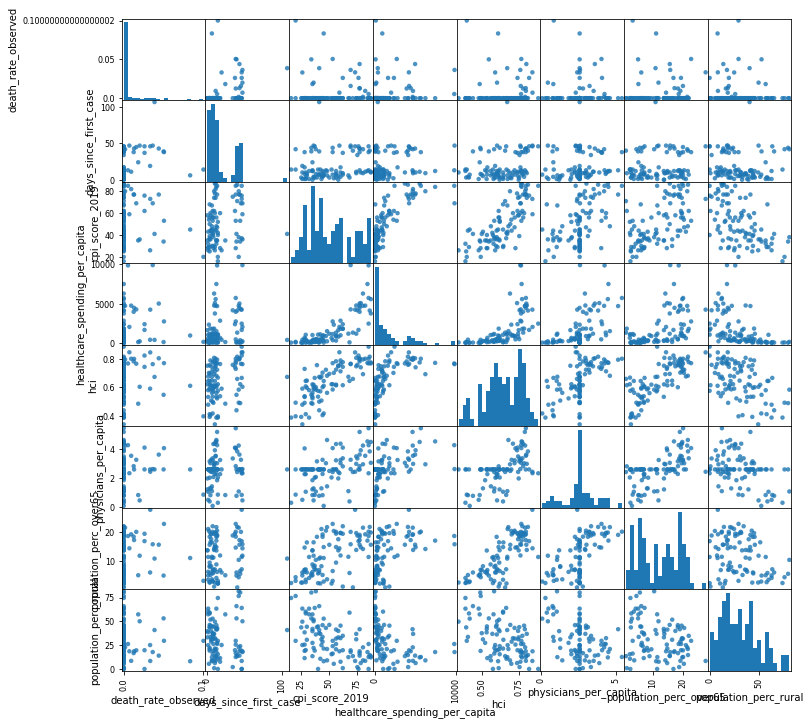

In [4]:
pairs = pd.plotting.scatter_matrix(df[df.columns[2::]], figsize=(12, 12),
                        hist_kwds={'bins': 20}, s=80, alpha=.8)

# Model

The approach here is to fit a hierarchical Bayes Binomial model on the case & death counts, while also controlling for the country-level covariates using an embedded logistic regression for the country-level mortality rates.  The model code (using pymc3) can be found in source/model.py.



In [5]:
# import importlib
# importlib.reload(model)
mod = model.initialize_model(df)

In [9]:
with mod:
    trace = pm.sample(1000, tune=3000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [tau, mu_model_logit, sigma, beta, sig_0, mu_0]
Sampling 2 chains, 166 divergences: 100%|██████████| 8000/8000 [05:13<00:00, 25.56draws/s]
There were 58 divergences after tuning. Increase `target_accept` or reparameterize.
There were 108 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8856434600058013, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124376e10>,
      dtype=object)

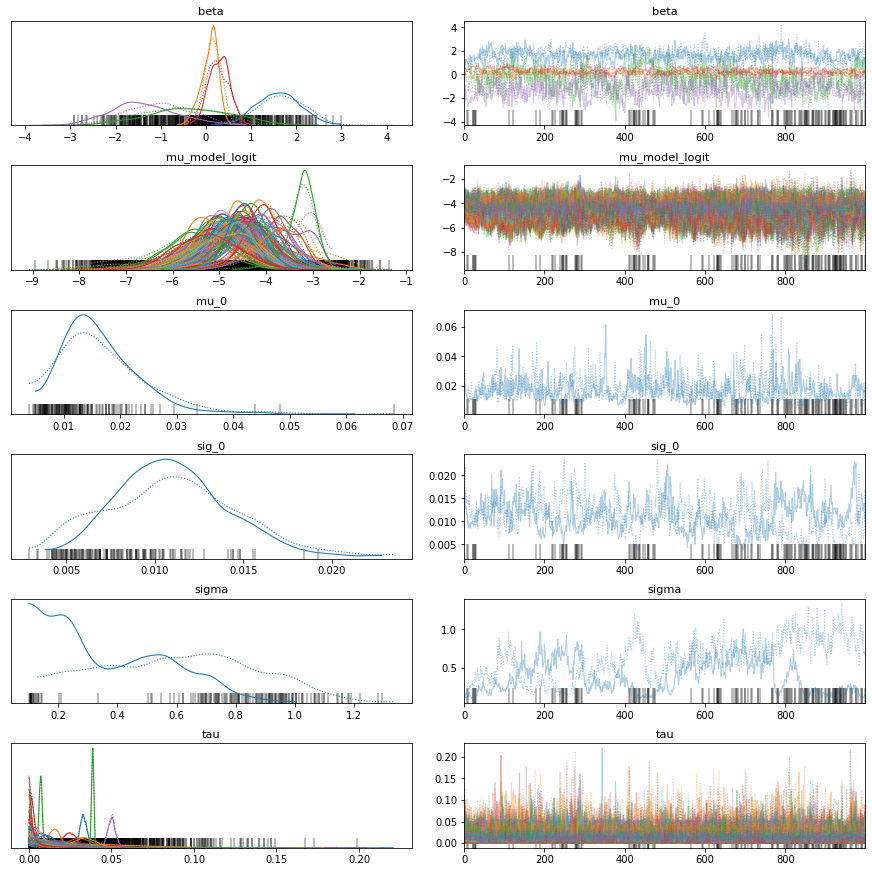

In [10]:
pm.traceplot(trace)


In [11]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta[0],1.638,0.506,0.671,2.537,0.043,0.030,141.0,141.0,142.0,546.0,1.00
beta[1],0.117,0.191,-0.293,0.434,0.015,0.011,158.0,158.0,165.0,225.0,1.03
beta[2],-0.435,0.911,-2.031,1.325,0.108,0.076,72.0,72.0,72.0,209.0,1.03
beta[3],0.271,0.235,-0.168,0.704,0.029,0.021,64.0,64.0,65.0,427.0,1.02
beta[4],-1.198,0.756,-2.657,0.153,0.090,0.064,71.0,71.0,69.0,371.0,1.06
mu_model_logit[0],-4.455,0.760,-5.869,-3.018,0.089,0.066,72.0,66.0,69.0,307.0,1.04
mu_model_logit[1],-4.709,0.643,-5.946,-3.472,0.099,0.082,42.0,31.0,53.0,45.0,1.05
mu_model_logit[2],-4.773,0.631,-5.922,-3.536,0.066,0.050,92.0,81.0,90.0,137.0,1.03
mu_model_logit[3],-4.585,0.601,-5.756,-3.456,0.035,0.025,294.0,294.0,265.0,333.0,1.06
mu_model_logit[4],-4.800,0.664,-6.134,-3.601,0.062,0.061,115.0,60.0,120.0,85.0,1.06


In [12]:
pm.summary(trace).loc['mu_0']

mean           0.017
sd             0.008
hpd_3%         0.005
hpd_97%        0.030
mcse_mean      0.001
mcse_sd        0.000
ess_mean     172.000
ess_sd       172.000
ess_bulk     105.000
ess_tail     127.000
r_hat          1.020
Name: mu_0, dtype: float64